# Lab01
23521563 - Đinh Bảo Thy

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Bài 1: phương pháp hồi quy tuyến tính
Sử dụng Numpy xây dựng phương pháp hồi quy tuyến tính và tiến hành huấn luyện trên bộ dữ liệu Forest Fires

Tiền xử lý

In [96]:
#thêm bộ dữ liệu
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [97]:
#Kiểm tra kiểu giá trị
for col_name in df.columns:
    print(col_name)
    print('Total NaN: ', df[col_name].isna().sum())
    print('Total Null: ', df[col_name].isnull().sum())
    print('Data type: ', df[col_name].dtype)
    print('-'*10)

X
Total NaN:  0
Total Null:  0
Data type:  int64
----------
Y
Total NaN:  0
Total Null:  0
Data type:  int64
----------
month
Total NaN:  0
Total Null:  0
Data type:  object
----------
day
Total NaN:  0
Total Null:  0
Data type:  object
----------
FFMC
Total NaN:  0
Total Null:  0
Data type:  float64
----------
DMC
Total NaN:  0
Total Null:  0
Data type:  float64
----------
DC
Total NaN:  0
Total Null:  0
Data type:  float64
----------
ISI
Total NaN:  0
Total Null:  0
Data type:  float64
----------
temp
Total NaN:  0
Total Null:  0
Data type:  float64
----------
RH
Total NaN:  0
Total Null:  0
Data type:  int64
----------
wind
Total NaN:  0
Total Null:  0
Data type:  float64
----------
rain
Total NaN:  0
Total Null:  0
Data type:  float64
----------
area
Total NaN:  0
Total Null:  0
Data type:  float64
----------


In [98]:
#Chuyển các giá trị chuỗi thành số
def convert_month(month: str) -> int:
    month_dict = {
        'jan' : 1, 
        'feb' : 2, 
        'mar' : 3, 
        'apr' : 4, 
        'may' : 5, 
        'jun' : 6, 
        'jul' : 7, 
        'aug' : 8, 
        'sep' : 9, 
        'oct' : 10, 
        'nov' : 11, 
        'dec' : 12
    }
    return month_dict[month]

df['month'] = df['month'].apply(convert_month)

In [99]:
def convert_day(day: str) -> int:
    day_dict = {
        'sun' : 0,
        'mon' : 1,
        'tue' : 2,
        'wed' : 3,
        'thu' : 4,
        'fri' : 5,
        'sat' : 6
    }
    return day_dict[day]

df['day'] = df['day'].apply(convert_day)

In [100]:
#Chia tập dữ liệu

def splitting(df: pd.DataFrame) -> tuple:
    X = df.drop(columns=['area']).to_numpy() #lấy các cột features
    y = df['area'].to_numpy().reshape(-1,1) #lấy cột area - target feature
    N = X.shape[0]
    X_train, X_test = np.split(X, indices_or_sections=[int(0.8*N)])
    y_train, y_test = np.split(y, indices_or_sections=[int(0.8*N)])

    print('X: ', X.shape, X_train.shape, X_test.shape)
    print('y: ', y.shape, y_train.shape, y_test.shape)
    
    return X_train, X_test, y_train, y_test

Xây dựng mô hình hồi quy tuyến tính

In [101]:
class LinearRegressionModel:
    # tham số tối ưu theta^ = ((X^T.X)^-1).X^T.y
    def fit(self, X:np.ndarray, y:np.ndarray) ->None:
        XTX = X.T @ X
        XTX_inv = np.linalg.inv(XTX)
        self.theta_hat = XTX_inv @ X.T @ y

    # dự đoán y đầu ra theo theta
    def predict(self, X:np.ndarray) -> np.ndarray:
        y_pred = X @ self.theta_hat
        return y_pred

    # tính sai số bình phương trung bình RMSE để đánh giá mô hình
    # sqrt(1/n * (y - y^)^2)
    def rmse(self, y:np.ndarray, y_hat=np.ndarray) -> float:
        rmse = (((y - y_hat)**2).mean())**0.5
        return rmse

In [102]:
lr = LinearRegressionModel()

In [103]:
# Huấn luyện mô hình
X_train, X_test, y_train, y_test = splitting(df)
lr.fit(X_train, y_train)

X:  (517, 12) (413, 12) (104, 12)
y:  (517, 1) (413, 1) (104, 1)


In [104]:
#Chạy trên tập test
print(lr.theta_hat.shape, X_test.shape)
y_pred = lr.predict(X_test)

(12, 1) (104, 12)


In [105]:
#Kết quả sai số dự đoán
print(y_pred.shape, y_test.shape)
rmse = lr.rmse(y_pred, y_test)
print('RMSE = ',rmse)

(104, 1) (104, 1)
RMSE =  79.4247726396297


## Bài 2: Chuẩn hoá dữ liệu 
Chuẩn hoá dữ liệu về phân phối có kỳ vọng là 0 và phương sai là 1. So sánh kết quả của mô hình sau khi được huấn luyện với dữ liệu đã được chuẩn hoá so với kết quả trong bài 1

In [106]:
print(df.describe())

                X           Y       month         day        FFMC         DMC  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807    7.475822    2.972921   90.644681  110.872340   
std      2.313778    1.229900    2.275990    2.143867    5.520111   64.046482   
min      1.000000    2.000000    1.000000    0.000000   18.700000    1.100000   
25%      3.000000    4.000000    7.000000    1.000000   90.200000   68.600000   
50%      4.000000    4.000000    8.000000    3.000000   91.600000  108.300000   
75%      7.000000    5.000000    9.000000    5.000000   92.900000  142.400000   
max      9.000000    9.000000   12.000000    6.000000   96.200000  291.300000   

               DC         ISI        temp          RH        wind        rain  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean   547.940039    9.021663   18.889168   44.288201    4.017602    0.021663   
std    248.066192    4.5594

In [107]:
#Chuẩn hóa dữ liệu
def standardization(df: pd.DataFrame, col_name:str) -> pd.Series:
    return (df[col_name] - df[col_name].mean()) / df[col_name].std()

for col in df.columns:
    if col_name not in ['month', 'day', 'area']:
        df[col] = standardization(df, col)

print(df.describe())

                X           Y       month         day        FFMC         DMC  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807    7.475822    2.972921   90.644681  110.872340   
std      2.313778    1.229900    2.275990    2.143867    5.520111   64.046482   
min      1.000000    2.000000    1.000000    0.000000   18.700000    1.100000   
25%      3.000000    4.000000    7.000000    1.000000   90.200000   68.600000   
50%      4.000000    4.000000    8.000000    3.000000   91.600000  108.300000   
75%      7.000000    5.000000    9.000000    5.000000   92.900000  142.400000   
max      9.000000    9.000000   12.000000    6.000000   96.200000  291.300000   

               DC         ISI        temp          RH        wind        rain  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean   547.940039    9.021663   18.889168   44.288201    4.017602    0.021663   
std    248.066192    4.5594

In [108]:
X_train_std, X_test_std, y_train_std, y_test_std = splitting(df)

X:  (517, 12) (413, 12) (104, 12)
y:  (517, 1) (413, 1) (104, 1)


In [109]:
lr_std = LinearRegressionModel()
lr_std.fit(X_train_std, y_train_std)
y_pred_std = lr_std.predict(X_test_std)
rmse_std = lr_std.rmse(y_pred_std, y_test)
print('RMSE = ',rmse)
print('RMSE Std = ', rmse_std)

RMSE =  79.4247726396297
RMSE Std =  79.4247726396297


***Kết luận:*** Mô hình chuẩn hóa cho kết quả tốt hơn

## Bài 3: Feature Engineering
Tiến hành kỹ thuật Feature Engineering, tìm ra các thuộc tính có tính
chất colinearity (linearly dependent). Huấn luyện lại phương pháp hồi quy tuyến tính
với bộ dữ liệu chỉ giữ lại các thuộc tính uncorrelated.

In [110]:
#Lọc lấy thuộc tính liên tục
df_cov = df.copy()
df_cov = df_cov.drop(['month', 'day', 'area'], axis=1)
df_cov.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


<Axes: >

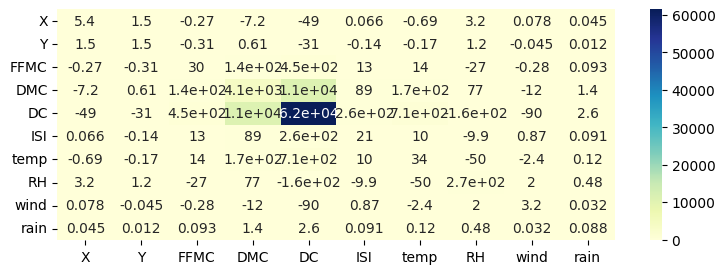

In [111]:
#tạo ma trận hiệp phương sai 0
cov = np.zeros((df_cov.shape[1], df_cov.shape[1]))

#tính hiệp phương sai
for i, col_i in enumerate(df_cov.columns):
    for j, col_j in enumerate(df_cov.columns):
        cov[i,j] = np.cov(df_cov[col_i], df_cov[col_j])[0,1]

plt.figure(figsize=(9,3))
sns.heatmap(cov, xticklabels=df_cov.columns, yticklabels=df_cov.columns, cmap='YlGnBu', annot=True)

Ta thấy các cặp thuộc tính không có độ tương quan lớn (đều bé hơn 0.8) nên mô hình sẽ không bị ảnh hưởng đáng kể bởi đa cộng tuyến.

Tuy nhiên, ta sẽ loại bỏ thử DMC/DC - cặp thuộc tính có độ tương quan cao nhất trong các cặp (r=0.68)

Ta biết:

DMC - Duff Moisture Code: độ ẩm của lớp trung gian (độ ẩm càng cao càng dễ cháy)

DC - Drought Code: độ khô của lớp đất sâu hơn (độ khô hạn càng cao càng dễ cháy)

Nên DMC sẽ cho biết tình trạng đất ngắn hạn (đất ẩm/khô/ướt do thời tiết) còn DC sẽ là tình trạng đất trong một thời gian dài tích lũy lại (cho ta biết khi bị ngập lụt/khô hạn kéo dài). Để dự đoán các trận cháy rừng, tốt nhất là ta giữ lại thuộc tính dài hạn - DC và loại bỏ bớt thuộc tính ngắn hạn - DMC

In [112]:
df_drop_DMC = df.drop(columns=['DMC'])
X_train_drop_DMC, X_test_drop_DMC, y_train_drop_DMC, y_test_drop_DMC = splitting(df_drop_DMC)

X:  (517, 11) (413, 11) (104, 11)
y:  (517, 1) (413, 1) (104, 1)


In [113]:
lr.fit(X_train_drop_DMC, y_train_drop_DMC)

y_pred_drop_DMC = lr.predict(X_test_drop_DMC)

rmse_drop_DMC = lr.rmse(y_pred_drop_DMC, y_test_drop_DMC)
print('RMSE\t\t',rmse)
print('RMSE Std\t', rmse_std)
print('RMSE Drop DMC\t', rmse_drop_DMC)

RMSE		 79.4247726396297
RMSE Std	 79.4247726396297
RMSE Drop DMC	 79.49852875818196


***Kết luận:*** Ta thấy việc loại bớt thuộc tính DMC trong trường hợp này không mang lại hiệu quả

## Bài 4: Thư viện Sklearn/Skorch
Sử dụng thư viện Machine Learning (Sklearn hoặc Skorch) thực thi lại phương pháp Linear Regression.

In [114]:
#thêm thư viện cần thiết
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

In [115]:
df_sk = pd.read_csv('forestfires.csv')
df_sk['month'] = df_sk['month'].apply(convert_month)
df_sk['day'] = df_sk['day'].apply(convert_day)
df_sk

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,0,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,0,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,0,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [116]:
X_sk = df_sk.drop(columns=['area']).to_numpy() 
y_sk = df_sk['area'].to_numpy().reshape(-1,1) 

X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(X_sk, y_sk, train_size=0.8)

print('X: ', X_sk.shape, X_train_sk.shape, X_test_sk.shape)
print('y: ', y_sk.shape, y_train_sk.shape, y_test_sk.shape)    

X:  (517, 12) (413, 12) (104, 12)
y:  (517, 1) (413, 1) (104, 1)


In [117]:
sk = LinearRegression()
sk.fit(X_train_sk, y_train_sk)
y_pred_sk = sk.predict(X_test_sk)
rmse_sk = root_mean_squared_error(y_test_sk, y_pred_sk) 
print('RMSE Sklearn =', rmse_sk)

RMSE Sklearn = 26.499572300142916
